## 1D epipolar geometry

Continuing with the last notebook, wherein we understood how to design a 1D pinhole camera, we will attempt to understand epipolar geometry in 1D and also set the background for reconstruction of a point using images from two camera. 

We designed a 1D pinhole camera using the image below

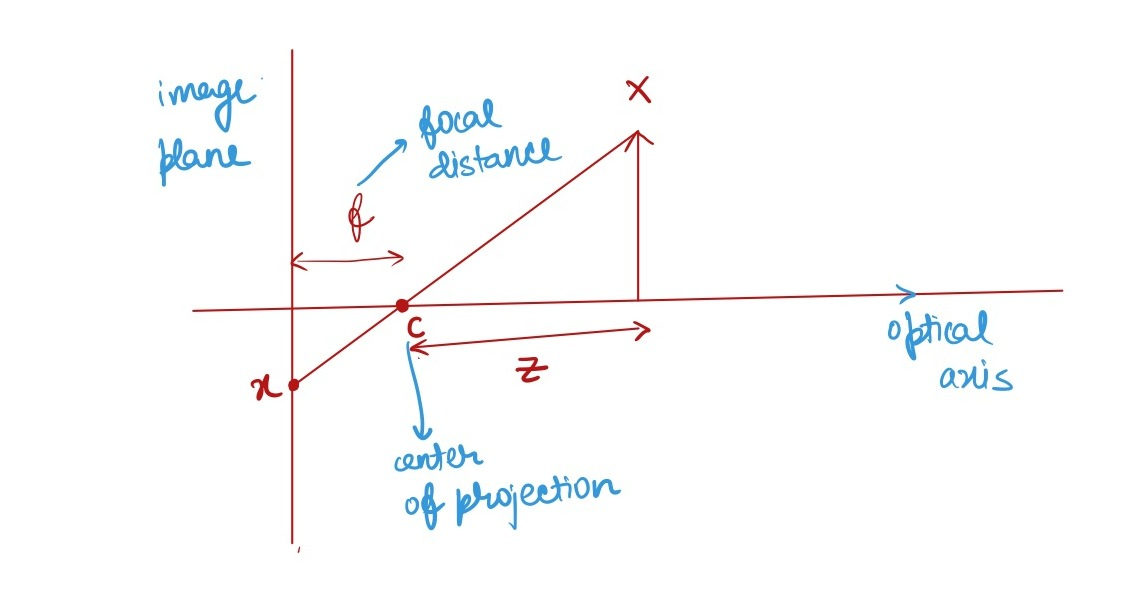

The relation between these variables is that 

$$x=-f \frac{X}{Z}$$

And when we put the camera behind the image plane, we get 

$$x=f \frac{X}{Z}$$

After this, let's design an system with two cameras, looking at the same point and capturing the image. 

## 1D epipolar geometry of a pair of cameras

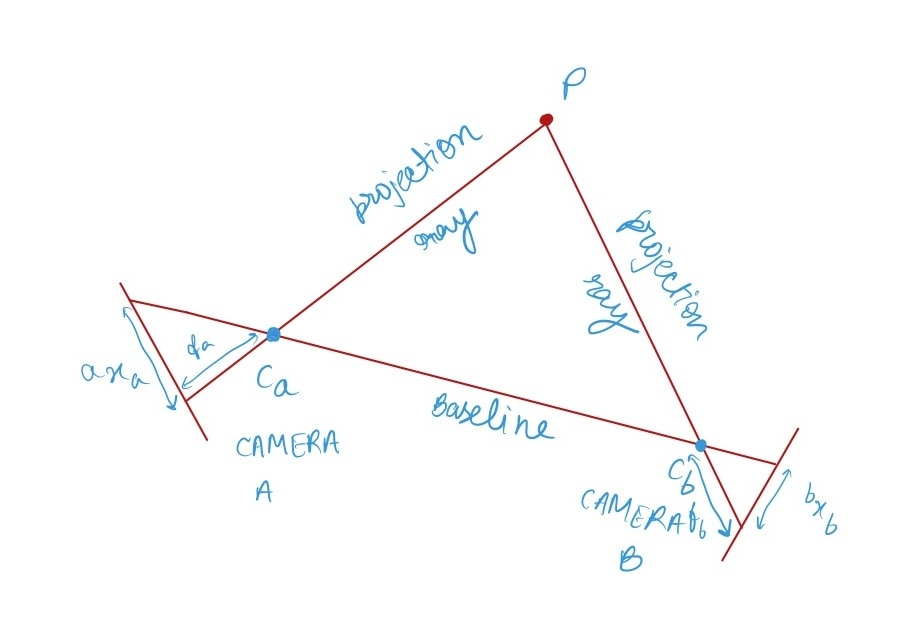

The point P and $C_{a}$ and $C_{b}$ which define the centres of projection for camera a and b respectively make a plane in space which is called **epipolar plane** of the point P. 

The line that connects both centres of projection is the **baseline** of the camera pair. The point at which baseline intersects both the image planes are called **epipoles** of the two images. For a particular configuration of a pair of cameras, the epipoles are fixed. 

If we have two images $I_{a}$ and $I_{b}$ taken from cameras a and b respectively and we don't know the point P but we do know the relative position and orientation of two cameras so we can use these to construct the point P. 

### Epipolar constraint

For points $p_{a}$ and $p_{b}$, defined as

$$ p_{a}=\begin{bmatrix} ^{a}x_{a} \\ f_{a} \end{bmatrix}$$ and $$p_{b}=\begin{bmatrix} ^{b}x_{b} \\ f_{b}\end{bmatrix} $$

$C_{a}$, $C_{b}$ and $p_{a}$ define the epipolar plane and by looking at the figure, we know that $p_{b}$ must lie somewhere along this line. For another point $p_{a'}$, we will get on the same epipolar line in the image $I_{b}$. This is knows as *epipolar constraint*. 

The epipolar constraint helps to narrow down the possible position of $p_{b}$. The concept can be algebraically expressed as *the essential matrix*

### The essential matrix

Defining the notation, $^{a}p_{a}$ is a point on the image plane, but it is viewed in the two-dimensional space. The reference system is represented by the **left superscript** is that of the camera the point appears in, represent by **right subscript**. 

Using the rigid transformation that we had discussed in Notebook 6, 
$$^{a}p = \ ^{b} R_{a}(^{b}p - ^{b}t_{a})$$

From the reference system of Camera a, the directions of the projection rays through points $p_{a}$ and $p_{b}$ are along $^{a}p_{a}$ and $^{b}R_{a} p_{b}$

Since the projection directions of $^{a}p_{a}$ and $^{b}R_{a}^{b}p_{b}$ and the baseline t are coplanar, their triple product will be zero

$$(^{b}R_{a} \ ^{b}p_{b})^{T}(t\times ^{a}p_{a})=0$$

or 

$$b^{T} E a=0$$

where 

$$b= \ ^{b}p_{b}$$
$$R= \ ^{a}R_{b}$$
$$a= \ ^{a}p_{a}$$


The Camera b with respect to Camera a has been translated by some vector t which is 

$$ t=\begin{bmatrix} t_{x} \\ t_{y} \end{bmatrix}$$ 


The essential matrix (E) is defined as

$$ E=R \times t$$

If we find the essential matrix E for a pair of cameras,
then we could find the equation of the epipolar line for every point $^{b}p_{b}$ in $I_{b}$

The following code is a simplified estimation of rotation and translation if we are given two 1D images, which are projection of 2 point. This will be useful when we reconstruct 2D image from 1D images in the next notebook.

In [2]:
#using the data provided in the course material. It is in 2D, so we will convert it into 1D image and then perform
#rigid tranformation in 2D

import pickle
import numpy as np

def load(filename):
    filename += '.pkl'
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data


#these are two images which we are going to reconstruct in the next notebook

image_1d =load('/Users/srtpan/Downloads/data/NoiseFree/NoiseFree')

In [3]:
#The input arrays p_original and q_original are 2×n. Each column contains the canonical Euclidean coordinates 
#of one of the n points in one of the two camera reference systems

p_original=image_1d['p']
q_original=image_1d['q']

In [4]:
def estimate_rotation_translation(p,q):
    
    #calculating the number of data points
    n=p_original.flatten().shape[0]
    
    #reshaping the first camera projection from 2D to 1D
    p=p_original.reshape((1,n))
    
    #reshaping the second camera projection from 2D to 1D
    q=q_original.reshape((1,n))
    
    #creating a 1D array to project the data from 1D to 2D
    o = np.ones((1, n)).astype(float)
    
    #concatentaing extra row to make p and q two-dimensional
    p, q = np.concatenate((p, o)), np.concatenate((q, o))
    A = np.zeros((n, 4))
    for k in range(n):
        A[k, :] = np.outer(q[:, k], p[:, k]).flatten() 
        
    #using SVD to create essential matrix  
    _, _, VT = np.linalg.svd(A)
    E = np.reshape(VT[-1, :], (2, 2))
    U, sigma, V = np.linalg.svd(E)
    W=np.array([[0,-1],[1,0]])
    dot_1=np.dot(U,W.T)
    
    #getting the rotation matrix
    R=np.dot(dot_1,V)
    dot1=np.dot(U,W)
    dot2=np.dot(dot1,sigma)
    
    #getting the translation matrix
    t=np.dot(dot2,U.T)
    
    return t,R

In [5]:
t,R=estimate_rotation_translation(p_original,q_original)

In [6]:
t

array([-0.65695584,  0.75392906])

In [7]:
R

array([[-0.99902664,  0.04411083],
       [-0.04411083, -0.99902664]])

We get translation and rotation matrix as we had discussed previously.

## References:

1. Duke University CS 527 Spring'22: https://courses.cs.duke.edu//spring22/compsci527/notes/n_10_reconstruction.pdf
2. Stanford CS 231 A: https://web.stanford.edu/class/cs231a/course_notes/03-epipolar-geometry.pdf